<a href="https://colab.research.google.com/github/aliasad20/Chitthi/blob/main/Project_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

In [8]:

!pip install -U LeXmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from LeXmo import LeXmo

In [10]:
# t= """From the beginning, she had sat looking at him fixedly.
#   As he now leaned back in his chair, and bent his deep-set eyes upon her in his turn,
#   perhaps he might have seen one wavering moment in her, 
#   when she was impelled to throw herself upon his breast,
#   and give him the pent-up confidences of her heart.
#   But, to see it, he must have overleaped at a bound the artificial barriers he had for many years been erecting, 
#   between himself and all those subtle essences of humanity which will elude the utmost cunning of algebra
#   until the last trumpet ever to be sounded shall blow even algebra to wreck.
#   The barriers were too many and too high for such a leap. With his unbending,
#   utilitarian, matter-of-fact face, he hardened her again;
#   and the moment shot away into the plumbless depths of the past,
#   to mingle with all the lost opportunities that are drowned there."""
# t="Yup bro and will have ice cream and special coffee. Hey. Yes we will surely meet and have fun together. Do you know I am going to visit you tomorrow. Hello. We will visit the park area and Taj Mahal positively and have a vivid view about the places. This will make us have fun and make the day enjoyful."
# Charles Dickens, Hard Times
cred = credentials.Certificate('servicekey.json')
app = firebase_admin.initialize_app(cred)
db = firestore.client()
doc_ref = db.collection(u'chats')
# .document(u'72bS8jJYa1Oci3xfYPnxdtCygjP2')
# msg_set= set()
msg=[]
doc = doc_ref.get()
type(doc)
for i in doc:
    if i.exists:
        doc_data = i.to_dict()
        # print(f'Document data: {doc_data}')
        data = doc_data.values()
        data=list(data)
        # print(len(data[0]))
        for j in data:
            for k in j:
                # print(k["text"])
                msg.append(k["text"])
    else:
        print(u'No such document!')
uni_msg = set(msg)
msg_data =""
for i in uni_msg:
    msg_data= msg_data+i+". "
# print(uni_msg)
# print(msg_data)

# New Section

In [11]:
emo=LeXmo.LeXmo(msg_data)

In [12]:
print(emo)

{'text': 'This will make us have fun and make the day enjoyful. Hello. Yes we will surely meet and have fun together. Do you know I am going to visit you tomorrow. Yup bro and will have ice cream and special coffee. We will visit the park area and Taj Mahal positively and have a vivid view about the places. Hey. I am feeling very good today as it is very nice weather. ', 'anger': 0.0, 'anticipation': 0.075, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.0875, 'negative': 0.0, 'positive': 0.1125, 'sadness': 0.0, 'surprise': 0.025, 'trust': 0.025}


In [13]:
emo.pop('text', None)

'This will make us have fun and make the day enjoyful. Hello. Yes we will surely meet and have fun together. Do you know I am going to visit you tomorrow. Yup bro and will have ice cream and special coffee. We will visit the park area and Taj Mahal positively and have a vivid view about the places. Hey. I am feeling very good today as it is very nice weather. '

In [14]:
print(emo)

{'anger': 0.0, 'anticipation': 0.075, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.0875, 'negative': 0.0, 'positive': 0.1125, 'sadness': 0.0, 'surprise': 0.025, 'trust': 0.025}


In [15]:
# type(emo)

{'anticipation': 0.075, 'joy': 0.0875, 'positive': 0.1125, 'surprise': 0.025, 'trust': 0.025}


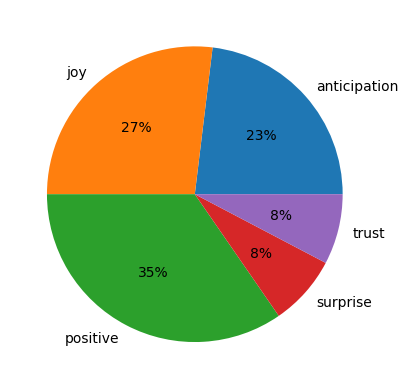

In [16]:
import matplotlib.pyplot as plt
emo_dict = { k: v  for k, v in emo.items() if v >0.00}


# Data to plot
labels = []
values = []

for x, y in emo_dict.items():
    labels.append(x)
    values.append(y)
print(emo_dict)

# Plot
plt.pie(values, labels=labels, autopct=lambda p: '{:.000f}%'.format(p ))

# plt.axis('equal')
plt.show()

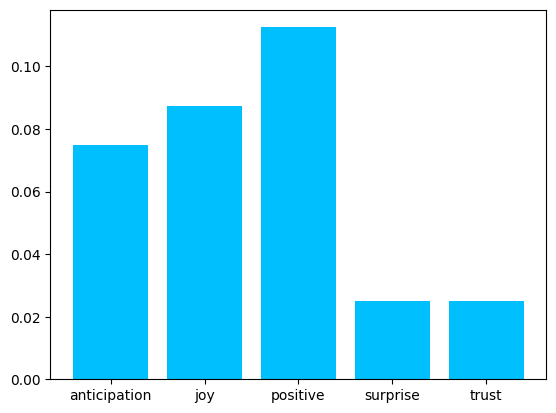

In [17]:
import matplotlib.pyplot as plt

emo_dict = {k: v for k, v in emo.items() if v >0.0}

plt.bar(range(len(emo_dict)), list(emo_dict.values()), align='center', color="deepskyblue")
plt.xticks(range(len(emo_dict)), list(emo_dict.keys()))


plt.show()